# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Habibisalim
- **Email:** m322d4ky2236@bangkit.academy
- **ID Dicoding:** habibisalim

## Menentukan Pertanyaan Bisnis

- What is the most popular day in weekday for casual users in the spring?
- What is the most popular day in weekday for register users in the winter?
- How many clusters will be formed, and what will be the shape of the clusters?

## 1. Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

## 2. Data Wrangling

### 2.1 Gathering Data

In [2]:
dir = "D:/MBKM/Bike-sharing-dataset/data"

data_day = pd.read_csv(dir + '/day.csv')
data_hour = pd.read_csv(dir + '/hour.csv')

In [3]:
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 2.2 Assessing Data

2.2.1 Checks the data type for each variable

In [5]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


> note: in "Non-Null", it can be seen that each number of values is the same, meaning that there are no missing values.

2.2.2 Check Outlier

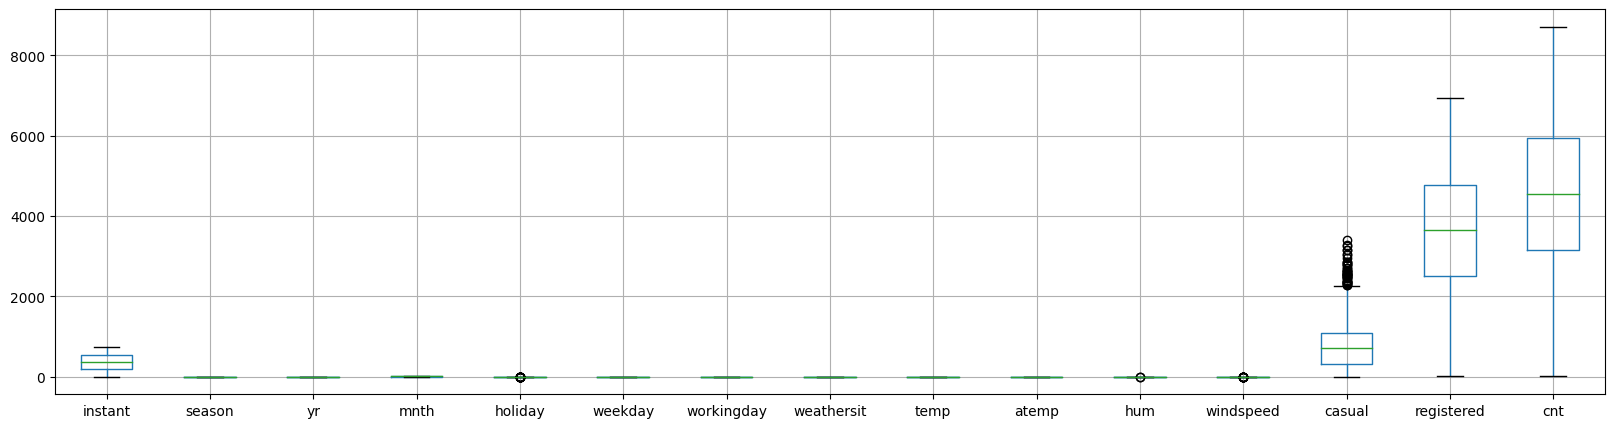

In [7]:
plt.figure(figsize=(20, 5))
data_day.boxplot()
plt.show()

> note: there are several columns that have outlier values, so cleaning data is needed.

### 2.3 Cleaning Data

In [8]:
def remove_outliers(df):

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR

    df = df[~((df < min) | (df > max)).any(axis = 1)]
    return df

print(f"Data day \n number of rows and columns before the outlier are removed: {data_day.shape}")
data_day = remove_outliers(data_day)
print(f" number of rows and columns after outliers are removed: {data_day.shape}")

print(f"\nData hour \n number of rows and columns before outliers are removed: {data_hour.shape}")
data_hour = remove_outliers(data_hour)
print(f" number of rows and columns after outliers are removed: {data_hour.shape}")


Data day 
 number of rows and columns before the outlier are removed: (731, 16)
 number of rows and columns after outliers are removed: (655, 16)

Data hour 
 number of rows and columns before outliers are removed: (17379, 17)
 number of rows and columns after outliers are removed: (14799, 17)


C:\Users\habib\AppData\Local\Temp\ipykernel_19252\1171346694.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\habib\AppData\Local\Temp\ipykernel_19252\1171346694.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\habib\AppData\Local\Temp\ipykernel_19252\1171346694.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < min) | (df > max)).any(axis = 1)]


## 3. Exploratory Data Analysis (EDA)

### 3.1 Exploration

3.1.1 Comparison of casual users with register users in 2011

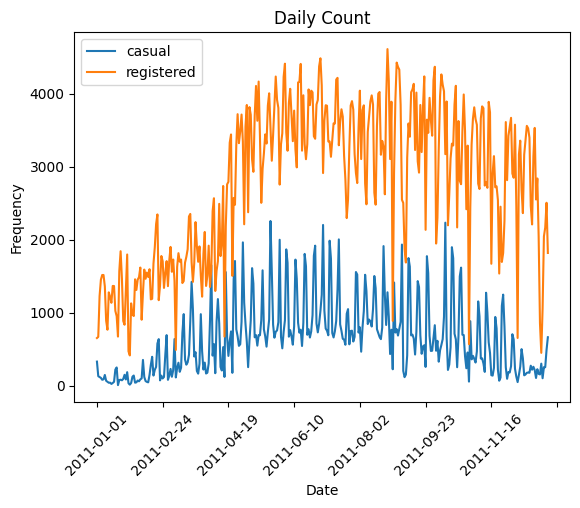

In [9]:
data_2011 = data_day.loc[data_day['yr'] == 0]
data_2011.plot(x='dteday', y=['casual', 'registered'], kind='line')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Daily Count')
plt.show()

3.1.2 Comparison of casual users with register users in 2011

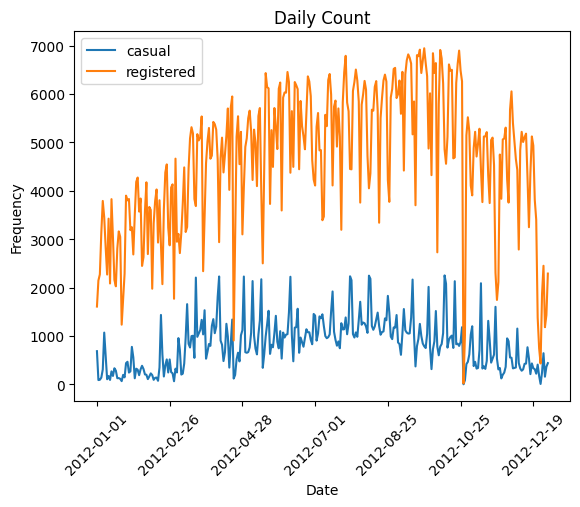

In [10]:
data_2011 = data_day.loc[data_day['yr'] == 1]
data_2011.plot(x='dteday', y=['casual', 'registered'], kind='line')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Daily Count')
plt.show()

>note: Whether in 2011 or 2012, registered users used more bicycles than casual users, although there has been a few significant declines.

## 4. Visualization & Explanatory Analysis

### 4.1 Pertanyaan 1: What is the most popular day (weekday) for casual users in the spring?

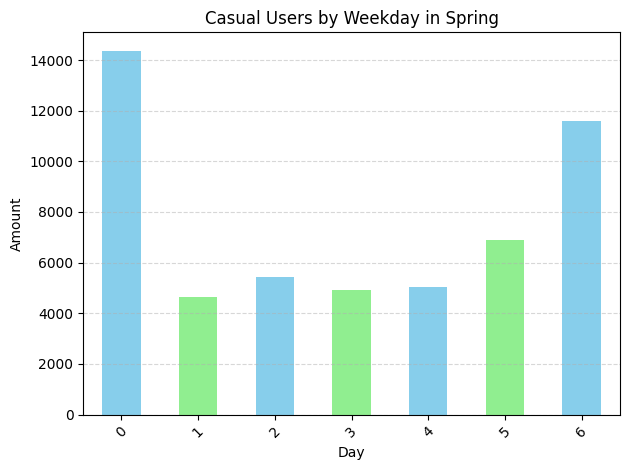

In [11]:
data_day_spring = data_day.loc[data_day['season'] == 1]
day_grouped = data_day_spring.groupby('weekday')
casual_by_weekday = day_grouped['casual'].sum()

casual_by_weekday.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Day')
plt.ylabel('Amount')
plt.title('Casual Users by Weekday in Spring')
plt.grid(axis='y', linestyle='--', alpha=0.5) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.2 Pertanyaan 2: What is the most popular day (weekday) for register users in the winter?

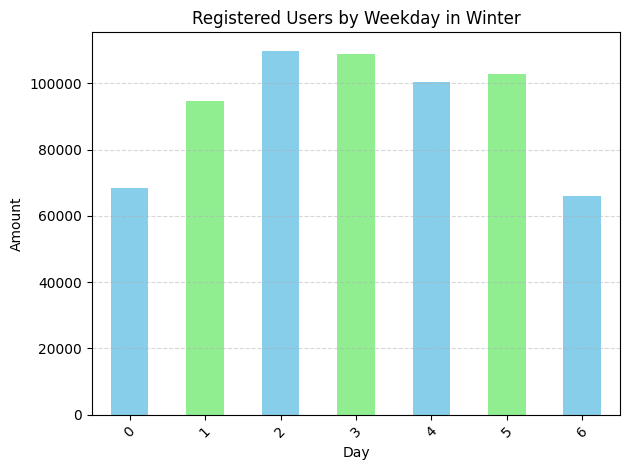

In [12]:
data_day_winter = data_day.loc[data_day['season'] == 4]
day_grouped = data_day_winter.groupby('weekday')
casual_by_weekday = day_grouped['registered'].sum()

casual_by_weekday.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Day')
plt.ylabel('Amount')
plt.title('Registered Users by Weekday in Winter')
plt.grid(axis='y', linestyle='--', alpha=0.5) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.3 Pertanyaan 3: How many clusters will be formed, and what will be the shape of the clusters?

4.3.1 Determine how many clusters are formed

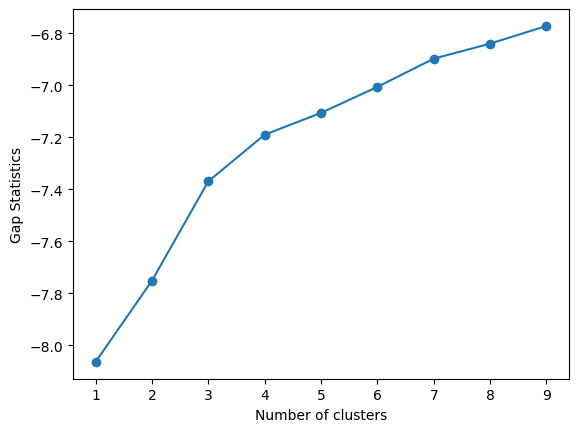

In [13]:
X = data_day[['cnt', 'temp', 'season']]
range_n_clusters = range(1,10)

gap_values = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(X)
    dists = cdist(X, kmeans.cluster_centers_, 'euclidean')
    avg_within_sum_square = np.sum(np.min(dists, axis = 1)) / X.shape[0]
    random_data = np.random.random_sample(size = X.shape)
    kmeans_random = KMeans(n_clusters = n_clusters)
    kmeans_random.fit(random_data)
    dists_random = cdist(random_data, kmeans_random.cluster_centers_, 'euclidean')
    avg_within_sum_square_random = np.sum(np.min(dists_random, axis = 1)) / random_data.shape[0]
    gap = np.log(avg_within_sum_square_random) - np.log(avg_within_sum_square)
    gap_values.append(gap)

# Plot Gap Statistics for every value of k
plt.plot(range_n_clusters, gap_values, linestyle = '-', marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Gap Statistics')
plt.show()


>note: by using the gap statistics method, 3 clusters were obtained.

4.3.2 Cluster shape

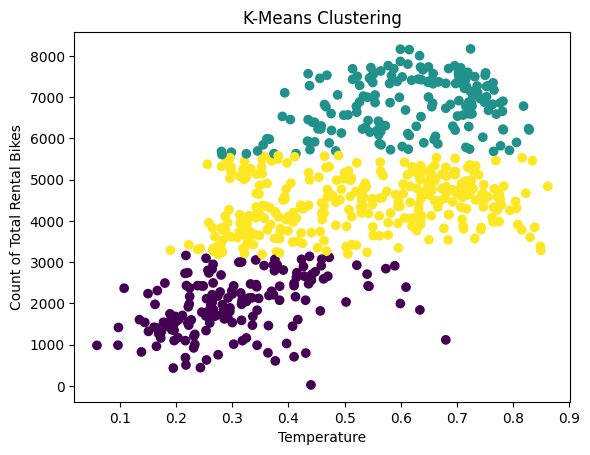

In [14]:
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(X)
labels = kmeans.labels_
data_day['cluster'] = labels

plt.scatter(data_day['temp'], data_day['cnt'], c=data_day['cluster'])
plt.xlabel('Temperature')
plt.ylabel('Count of Total Rental Bikes')
plt.title('K-Means Clustering')
plt.show()

## Conclusion

- What is the most popular day in weekday for casual users in the spring?
>The most popular day in spring among regular users is Sunday.

- What is the most popular day in weekday for registered users in the winter?
>The most popular day in winter among registered users is Tuesday.

- How many clusters will be formed, and what will be the shape of the clusters?
>There are 3 cluster formed by using column temperature, count of total rental bikes, and season.